## Supervised Machine Learning (Part 1) - Practical Assessment

Task 1: Understanding Supervised Learning

Define Supervised Learning:
- Provide a concise definition of supervised learning and explain its role in machine learning.


Answer:
- Supervised machine learning is a machine learning technique that uses data which is structured and well labelled to do either predictions or classifications. it is an essential machine learning approach in which the machine is trained with data that has expected outcomes with the aim to predict or classify appropriate data fed into it with high accuracy and precision.

Types of Supervised Learning (3 marks):
- Differentiate between classification and regression tasks.
- Provide two examples for each type, explaining the nature of input features and target labels.


Answers
- Classification tasks have target variables which are categorical like 1 or 0, yes or no and data is grouped under these categories meanwhile regression tasks involve a continous variables which the aim to predict a continous variable based on independent variables using the straight line theory.

- Example of classification tasks: Predicting whether a patient is malaria positive or malaria negative and predicting whether a participant is labelled as over weight or not. the nature of input features could be categorical or continous. the target label is always categorical.

- Example of regression tasks: predicting sales figures of a company and predicting the systolic BP of patients. here the nature of features variables are continous and the target label is also continous.

Task 2: Classification Algorithms (Decision Trees, Naïve Bayes)

Decision Trees:
- Implement a decision tree classifier using Scikit-Learn with a provided dataset.
- Evaluate the model's performance and discuss the key decisions made by the tree.


In [62]:
# import necessary libraries for data exploration

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# import the train test split

from sklearn.model_selection import train_test_split

# import the standardscaler from scikit learn

from sklearn.preprocessing import StandardScaler

# import the minmax scaler

from sklearn.preprocessing import MinMaxScaler

# import the label encoder from scikit learn

from sklearn.preprocessing import LabelEncoder

# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# import naive bayes classifier

from sklearn.naive_bayes import GaussianNB

# import a regressor

from sklearn.linear_model import LinearRegression

# import performance matrix
from sklearn.metrics import recall_score, precision_score, f1_score,accuracy_score, mean_squared_error

In [63]:
# import the dataset

data = pd.read_csv(r'Telco-Customer-Churn.csv')

In [64]:
# display the first few rows

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
# select variables of interest
# churn is the target variable

data = data[['SeniorCitizen','Partner', 'tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges','Churn' ]]

In [66]:
# encode categorical data using the labelencoder
# initialize the encoder

lb = LabelEncoder()

# perform label encoding

data['Partner'] = lb.fit_transform(data['Partner'])
data['PhoneService'] = lb.fit_transform(data['PhoneService'])
data['PaperlessBilling'] = lb.fit_transform(data['PaperlessBilling'])
data['Churn'] = lb.fit_transform(data['Churn'])


In [67]:
# preview data

data

,SeniorCitizen,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,0,1,1,0,1,29.85,0
1,0,0,34,1,0,56.95,0
2,0,0,2,1,1,53.85,1
3,0,0,45,0,0,42.30,0
4,0,0,2,1,1,70.70,1
...,...,...,...,...,...,...,...
7038,0,1,24,1,1,84.80,0
7039,0,1,72,1,1,103.20,0
7040,0,1,11,0,1,29.60,0
7041,1,1,4,1,1,74.40,1


In [68]:
# separate data to features and target

X = data.drop('Churn', axis=1)
y = data['Churn']

In [69]:
# divide set to train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

Model training


In [70]:
# initial decision tree classifier
dt = DecisionTreeClassifier()

# fit the model
dt.fit(X_train, y_train)

# use model for prediction
prediction = dt.predict(X_test)

In [71]:
# display predicted values

print(prediction)

[0 0 0 ... 0 0 1]


Evaluate the model

In [72]:
# print the performance matrix


print("Accuracy:", "%.3f" % accuracy_score(y_test, prediction))
print("Precision:", "%.3f" % precision_score(y_test, prediction))
print("Recall:", "%.3f" % recall_score(y_test, prediction))
print("F1 Score:", "%.3f" % f1_score(y_test, prediction))

Accuracy: 0.758


Precision: 0.503
Recall: 0.531
F1 Score: 0.516


The model has an accuracy of 0.746 which indicates that the model is correct overall for 74.6%. However, the accuracy is relatively low (48.0%) which means the model cannot effectively predict the target variable

Naïve Bayes:
- Implement a Naïve Bayes classifier with the same dataset.
- Compare the performance of the Naïve Bayes classifier with the decision tree


Model traing using naive bayes classifier

In [73]:
# initialize the model

gnb = GaussianNB()

# fit the model

gnb.fit(X_train, y_train)

# predict

ypred = gnb.predict(X_test)

Evaluate model performance

In [74]:
print("Accuracy:", "%.3f" % accuracy_score(y_test, ypred))
print("Precision:", "%.3f" % precision_score(y_test, ypred))
print("Recall:", "%.3f" % recall_score(y_test, ypred))
print("F1 Score:", "%.3f" % f1_score(y_test, ypred))

Accuracy: 0.764
Precision: 0.517
Recall: 0.481
F1 Score: 0.498


Naive bayes has an accuracy of 76.4% and a precision of 51.7%. Compare to the decision tree classifier, the naive bayes model performs better with the given data.

Task 3: Regression Algorithms (Linear Regression):


Linear Regression Basics:

- Implement a linear regression model using a sample dataset provided.
- Display and interpret the regression line and coefficients.

Model Evaluation in Regression:

- Evaluate the linear regression model using appropriate metrics (e.g., Mean Squared Error).
- Discuss the practical implications of the model's performance.


In [75]:
# load the dataset

data = pd.read_excel(r'omdena2.xlsx')

In [76]:
# display first few rows of the dataset

data.head()

,Age,Weight(kg),Height(cm),Systolic BP,BMI,Overweight
0,13,43.0,157,118.0,17.4,No
1,14,46.0,159,111.0,18.2,No
2,10,33.0,132,94.0,19.2,YES
3,19,65.0,168,126.0,23.1,No
4,12,31.0,151,87.0,13.8,No


In [77]:
# display information about the variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1229 non-null   int64  
 1   Weight(kg)   1229 non-null   float64
 2   Height(cm)   1229 non-null   int64  
 3   Systolic BP  1224 non-null   float64
 4   BMI          1229 non-null   float64
 5   Overweight   1229 non-null   object 
dtypes: float64(3), int64(2), object(1)
memory usage: 57.7+ KB


In [78]:
# check if there are missing values

data.isna().sum()

Age            0
Weight(kg)     0
Height(cm)     0
Systolic BP    5
BMI            0
Overweight     0
dtype: int64

In [79]:
# drop null values

data = data.dropna(subset='Systolic BP')

In [80]:
# check that no null value exist in the data now

data.isnull().sum()

Age            0
Weight(kg)     0
Height(cm)     0
Systolic BP    0
BMI            0
Overweight     0
dtype: int64

In [81]:
# display data

data

,Age,Weight(kg),Height(cm),Systolic BP,BMI,Overweight
0,13,43.0,157,118.0,17.400000,No
1,14,46.0,159,111.0,18.200000,No
2,10,33.0,132,94.0,19.200000,YES
3,19,65.0,168,126.0,23.100000,No
4,12,31.0,151,87.0,13.800000,No
...,...,...,...,...,...,...
1224,15,45.5,156,112.0,18.696581,No
1225,14,57.0,163,135.0,21.300000,No
1226,16,54.0,158,106.0,21.631149,No
1227,15,47.0,154,109.0,19.900000,No


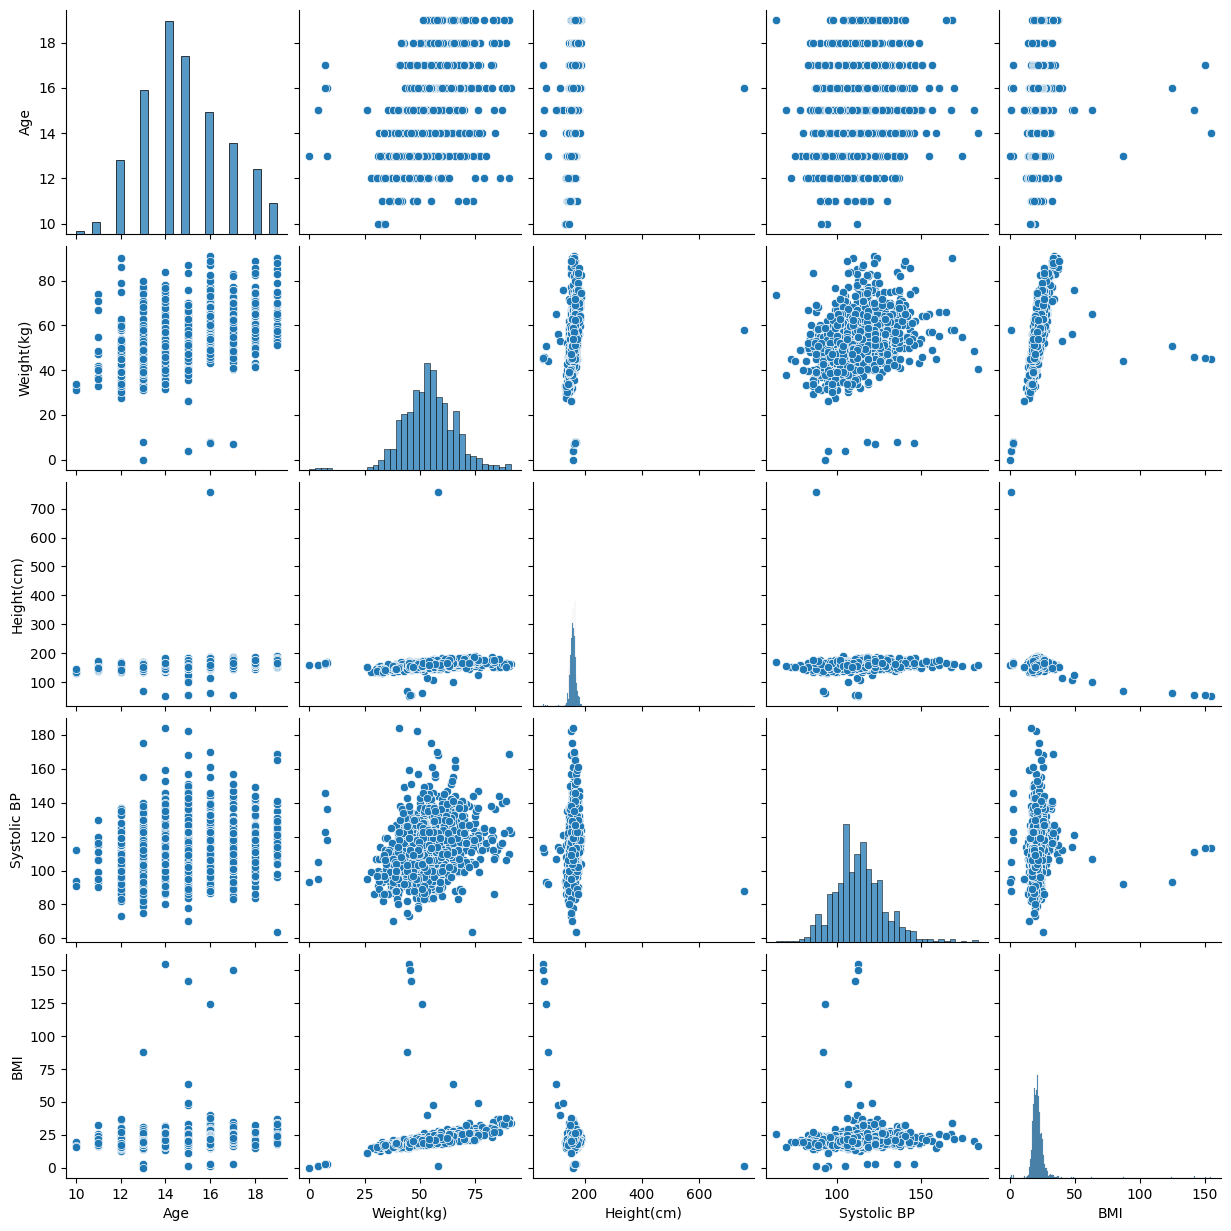

In [82]:
# visualize relationship between variables to examine the best variables for regression

sns.pairplot(data)

In this task i will perform simple linear regression to predict systolic BP based on the Weight variable

In [83]:
# subset the data

data = data[['Weight(kg)', 'Systolic BP']]
data

,Weight(kg),Systolic BP
0,43.0,118.0
1,46.0,111.0
2,33.0,94.0
3,65.0,126.0
4,31.0,87.0
...,...,...
1224,45.5,112.0
1225,57.0,135.0
1226,54.0,106.0
1227,47.0,109.0


In [84]:
# separate the data into feature and response variables

X = data['Weight(kg)']
y = data['Systolic BP']

In [85]:
# split the data into train, and test in the ratio 0.8:0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

In [86]:
X_train

588     67.0
1061    31.6
10      34.0
518     52.0
424     75.0
        ... 
1048    51.2
1099    54.0
1135    51.3
864     40.5
1131    70.2
Name: Weight(kg), Length: 979, dtype: float64

Now, X_train and X_test are one dimensional. But we need a 2-d array for the regression model. Hence we will reshape the data to 2-d arrays.

In [87]:
# reshape the X features

X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
X_train

array([[67. ],
       [31.6],
       [34. ],
       [52. ],
       [75. ],
       [63. ],
       [53. ],
       [57.5],
       [63. ],
       [61. ],
       [39. ],
       [70. ],
       [61. ],
       [64. ],
       [55. ],
       [44. ],
       [43. ],
       [49.7],
       [ 8. ],
       [50. ],
       [46. ],
       [77. ],
       [47. ],
       [63. ],
       [69. ],
       [52. ],
       [54. ],
       [49. ],
       [54. ],
       [69.2],
       [ 7.2],
       [52. ],
       [67. ],
       [55. ],
       [57. ],
       [68. ],
       [48.3],
       [52. ],
       [59. ],
       [43.5],
       [53. ],
       [45. ],
       [53. ],
       [44. ],
       [43. ],
       [66. ],
       [60. ],
       [39. ],
       [54.3],
       [62. ],
       [60. ],
       [72.5],
       [65. ],
       [75. ],
       [66. ],
       [50. ],
       [67. ],
       [33.4],
       [58.8],
       [52.2],
       [45. ],
       [32. ],
       [69. ],
       [46. ],
       [68. ],
       [41. ],
       [59

In [88]:
# Train the linear regression Model

lr_model = LinearRegression() # Innitilise teh mode

# fit the model
lr_model.fit(X_train, y_train)

# do predictions

predicted = lr_model.predict(X_test)

In [89]:
# print the training parameters

print('intercept: ', lr_model.intercept_)
print('m is: ', lr_model.coef_)

intercept:  92.33550138117964
m is:  [0.38300185]


Text(0, 0.5, 'systolic Bp')

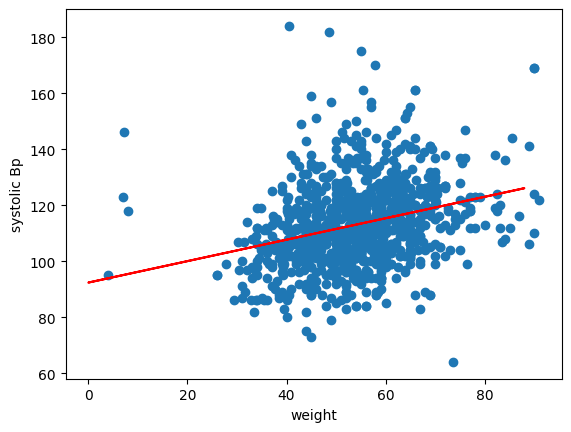

In [90]:
# visualize the regression line

plt.scatter(X_train, y_train)
plt.plot(X_test, predicted, color='red')
plt.xlabel("weight")
plt.ylabel('systolic Bp')

Model Evaluation

In [97]:
# print the mean square error

print(mean_squared_error(y_test, predicted))


189.73118602892922


The mean square error means the average of the squared errors from each data point from the predicted line. A small mean square error indicates a model is performing well in predicting.

The mean square error of 189.7 from our model above, indicate a very poor model performance. this is because the value is large hence model performance is poor.

Task 4: Data Understanding with Statistics

Descriptive Statistics:
- Calculate and interpret mean, median, and standard deviation for a given dataset.
- Create visualizations, such as histograms and box plots, to represent the data distribution.


In [99]:
# import a dataset 

data = pd.read_csv('omdena.csv')

# using .head() to display first five rows of the data

data.head()

,SN,Location,School types,Class,Age,Sex,Household size,Education level,Overweight in family,Mean to go to school,Weight(kg),Height(cm),Abdominal sie,Systolic BP,BMI,Overweight
0,6,Semi urban,Day school,3,13,Female,1,Secondary,No,On foot,43,157,75,118,17.4,No
1,7,Semi urban,Day school,3,14,Female,2,University,No,On foot,46,159,76,111,18.2,No
2,22,Semi urban,Day school,1,10,Female,2,University,No,On foot,33,132,63,94,19.2,YES
3,24,Semi urban,Day school,4,19,Female,2,Primary,No,On foot,65,168,80,126,23.1,No
4,32,Semi urban,Day school,3,12,Female,2,University,No,On foot,31,151,70,87,13.8,No


In [100]:
# calculate the mean, median and standard deviation of the numeric variables
# use the describe()

data.describe()

,SN,Class,Age,Household size,Weight(kg),Height(cm),BMI
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,619.245728,3.864117,14.827502,2.428804,54.090317,159.379170,21.873149
std,356.459401,1.457964,1.861103,0.806640,11.451604,20.850822,10.066200
min,1.000000,1.000000,10.000000,1.000000,0.000000,49.000000,0.000000
25%,312.000000,3.000000,14.000000,2.000000,47.000000,154.000000,18.900000
50%,620.000000,4.000000,15.000000,2.000000,54.000000,160.000000,20.900000
75%,927.000000,4.000000,16.000000,3.000000,61.000000,165.000000,23.000000
max,1235.000000,7.000000,19.000000,4.000000,91.000000,757.000000,180.800000


The output cell above gives the mean, median (50% percentile) and standard deviation (std) for all the numeric coloumns in the dataset

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

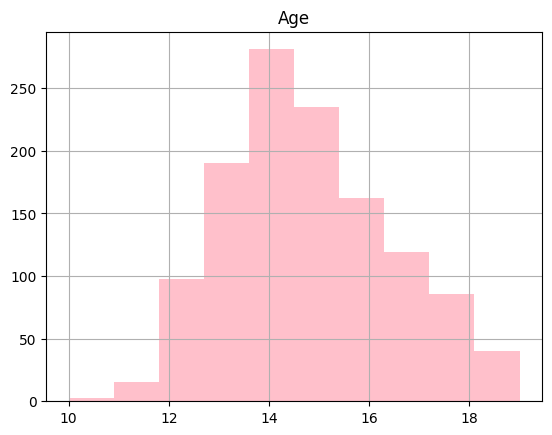

In [107]:
# represent age on the histogram

data.hist(column='Age', color='pink')




<Axes: >

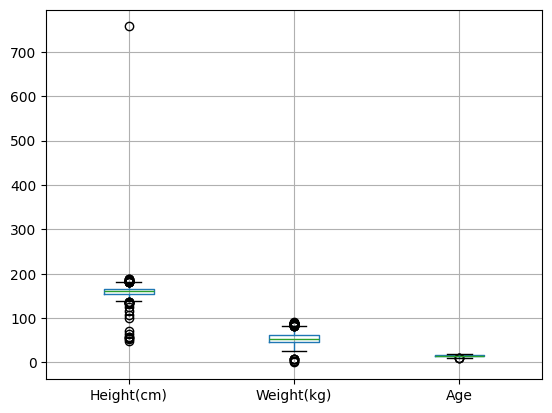

In [113]:
# represent height, weight, age on a box plot

data.boxplot(column=['Height(cm)', 'Weight(kg)', 'Age'])

Statistical Visualization:

- Choose one visualization method (e.g., scatter plot or box plot) to represent relationships or trends in a dataset.
- Provide a brief explanation of why the selected visualization is suitable.


Visualization method: scatter plot

Text(0.5, 1.0, 'scatter plot of height and BNI')

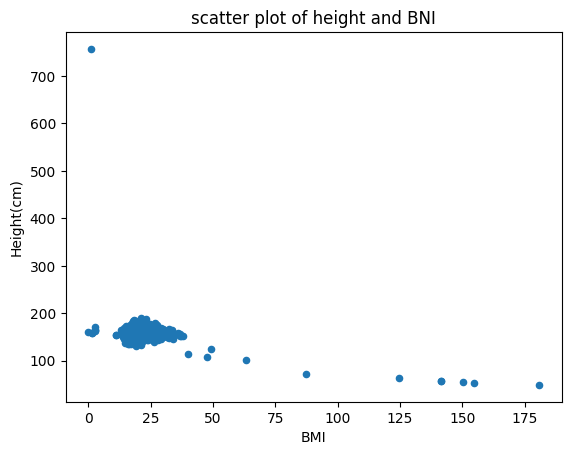

In [115]:
# visualize the relation between Height and BMI

data.plot(kind='scatter', x='BMI', y='Height(cm)')
plt.title("scatter plot of height and BNI")

Why choose a scatter plot?
- this is because from the plot, the relationship between 2 variables can be visualized and it can be observed whether one variable can influence the rise or decrease in another variable. This is an important plot to quickly verify if two variables are suitable for linear regression or not.